<a href="https://colab.research.google.com/github/Yarentzi34/Unidad-4/blob/main/Problemario_Unidad_V_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problemario de bloqueo

##Problema 1:
Se hace un estudio sobre la efectividad de tres marcas de atomizador para matar moscas. Para ello, cada producto se aplica a un grupo de 100 moscas, y se cuenta el número de moscas muertas expresado en porcentajes. Se hicieron seis réplicas, pero en días diferentes; por ello, se sospecha que puede haber algún efecto importante debido a esta fuente de variación. Los datos obtenidos se muestran a continuación:

| Marca de atomizador | Réplica 1 | Réplica 2 | Réplica 3 | Réplica 4 | Réplica 5 | Réplica 6 |
|----------------------|-----------|-----------|-----------|-----------|-----------|-----------|
| 1                   | 72        | 65        | 67        | 75        | 62        | 73        |
| 2                   | 55        | 59        | 68        | 70        | 53        | 50        |
| 3                   | 64        | 74        | 61        | 58        | 51        | 69        |

**Preguntas:**

**a) Suponiendo un DBCA, formule las hipótesis adecuadas y el modelo estadístico.**  
Hipótesis:
𝐻0: No hay diferencias significativas en la efectividad promedio de las marcas.

𝐻𝑎: Hay diferencias significativas en la efectividad promedio de las marcas.

Modelo: Análisis de varianza (ANOVA) considerando bloque (días) y tratamiento (marca).

**b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?**
No hay diferencias significativas entre las marcas (𝑝=0.1028>0.05).

**c) ¿Hay algún atomizador mejor? Argumente su respuesta**
 No se puede determinar un atomizador mejor porque el análisis de varianza (ANOVA) mostró que no hay diferencias significativas entre las marcas de atomizadores (p = 0.1028). Esto significa que las variaciones observadas en la efectividad de los atomizadores podrían deberse al azar y no a diferencias reales entre los productos.

**d) ¿Hay diferencias significativas en los resultados de diferentes días en que se realizó el experimento? Argumente su respuesta.**
No hay diferencias significativas entre los días en que se realizó el experimento (p = 0.4207). Esto sugiere que el día en que se aplicaron los atomizadores no tuvo un impacto significativo en la efectividad de los productos, y cualquier variación observada es probablemente aleatoria.

**e) Verifique los supuestos de normalidad y de igual varianza entre las marcas.**
Normalidad:Se confirma con el Test de Shapiro-Wilk (p>0.05 en todas las réplicas).
Homocedasticidad: Se onfirma con el Test de Bartlett (p=0.76>0.05).


In [34]:
# Wendy Yarentzi Rebeles Vélez
import pandas as pd
from io import StringIO

data = '''
Marca,Replica,Mosca
1,1,72
1,2,65
1,3,67
1,4,75
1,5,62
1,6,73
2,1,55
2,2,59
2,3,68
2,4,70
2,5,53
2,6,50
3,1,64
3,2,74
3,3,61
3,4,58
3,5,51
3,6,69
'''

df = pd.read_csv(StringIO(data))
df

,Marca,Replica,Mosca
0,1,1,72
1,1,2,65
2,1,3,67
3,1,4,75
4,1,5,62
5,1,6,73
6,2,1,55
7,2,2,59
8,2,3,68
9,2,4,70


In [35]:
# Wendy Yarentzi Rebeles Vélez
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Replica'    # La variable que no me interesa comparar
interes = 'Marca'      # La variable que me interesa comparar
respuesta = 'Mosca'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

Resultados del ANOVA:
                sum_sq    df         F    PR(>F)
C(Marca)    296.333333   2.0  2.880752  0.102804
C(Replica)  281.333333   5.0  1.093973  0.420718
Residual    514.333333  10.0       NaN       NaN

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


In [36]:
# Wendy Yarentzi Rebeles Vélez
from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo
prueba_shapiro(df[df['Replica'] == 1]['Mosca'], "Grupo 1", nivel_de_significancia)
prueba_shapiro(df[df['Replica'] == 2]['Mosca'], "Grupo 2", nivel_de_significancia)
prueba_shapiro(df[df['Replica'] == 3]['Mosca'], "Grupo 3", nivel_de_significancia)
prueba_shapiro(df[df['Replica'] == 4]['Mosca'], "Grupo 4", nivel_de_significancia)




Prueba de Shapiro-Wilk para Grupo 1:
Estadístico: 0.9988
Valor p: 0.9352
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 2:
Estadístico: 0.9868
Valor p: 0.7804
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 3:
Estadístico: 0.8547
Valor p: 0.2530
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 4:
Estadístico: 0.9465
Valor p: 0.5542
Interpretación: Los datos tienen una distribución normal.


In [37]:
# Wendy Yarentzi Rebeles Vélez
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Replica'] == 1]['Mosca'],
    df[df['Replica'] == 2]['Mosca'],
    df[df['Replica'] == 3]['Mosca'],
    df[df['Replica'] == 4]['Mosca']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")


Estadístico de Bartlett: 1.1707015718257703
Valor p: 0.7600395165079518
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


## Problema 2
Se comprueba el peso en gramos de un material de tres proveedores: **A, B y C**, por tres diferentes inspectores: **I, II y III**, utilizando tres diferentes escalas: **1, 2 y 3**. El experimento se lleva a cabo como el siguiente cuadro latino:

| Inspector | Escala 1 | Escala 2 | Escala 3 |
|-----------|----------|----------|----------|
| I         | A = 16   | B = 10   | C = 11   |
| II        | B = 15   | C = 9    | A = 14   |
| III       | C = 13   | A = 11   | B = 13   |

**Preguntas:**
**a) ¿Hay diferencias entre los proveedores?**  
Sí, hay diferencias significativas entre los proveedores (p = 0.0200). Esto indica que al menos uno de los proveedores tiene un peso promedio diferente al de los otros, lo que sugiere que la calidad del material puede variar según el proveedor.

**b) ¿Hay diferencias entre los inspectores y entre las escalas?**
No hay diferencias significativas entre los inspectores (p = 0.5000), lo que indica que los inspectores no influyen en las mediciones del peso del material. Sin embargo, sí hay diferencias significativas entre las escalas (p = 0.0067), lo que sugiere que las escalas utilizadas pueden tener variaciones en sus mediciones y podrían necesitar calibración.

**c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?**
El proveedor con mejor desempeño es A, ya que el peso promedio está más cerca de 15g.

**d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.**  


In [38]:
# Wendy Yarentzi Rebeles Vélez
import pandas as pd
from io import StringIO

data = '''
Inspector,Escala,Proveedor,Peso
1,1,A,16
1,2,B,10
1,3,C,11
2,1,B,15
2,2,C,9
2,3,A,14
3,1,C,13
3,2,A,11
3,3,B,13




'''

df = pd.read_csv(StringIO(data))
df

,Inspector,Escala,Proveedor,Peso
0,1,1,A,16
1,1,2,B,10
2,1,3,C,11
3,2,1,B,15
4,2,2,C,9
5,2,3,A,14
6,3,1,C,13
7,3,2,A,11
8,3,3,B,13


In [39]:
# Wendy Yarentzi Rebeles Vélez
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Inspector'   # Primer bloque (factor no principal)
bloque_2 = 'Escala'      # Segundo bloque (factor no principal)
interes = 'Proveedor'       # Variable de interés (tratamiento)
respuesta = 'Peso'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

Resultados del ANOVA para el Cuadro Latino:
                 sum_sq   df      F    PR(>F)
C(Proveedor)  10.888889  2.0   49.0  0.020000
C(Inspector)   0.222222  2.0    1.0  0.500000
C(Escala)     32.888889  2.0  148.0  0.006711
Residual       0.222222  2.0    NaN       NaN

Conclusión: Hay diferencias significativas: Proveedor.
Conclusión: No hay diferencias significativas: Inspector.
Conclusión: Hay diferencias significativas: Escala.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     -1.0 0.8649 -6.9049 4.9049  False
     A      C  -2.6667 0.4051 -8.5716 3.2382  False
     B      C  -1.6667 0.6793 -7.5716 4.2382  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

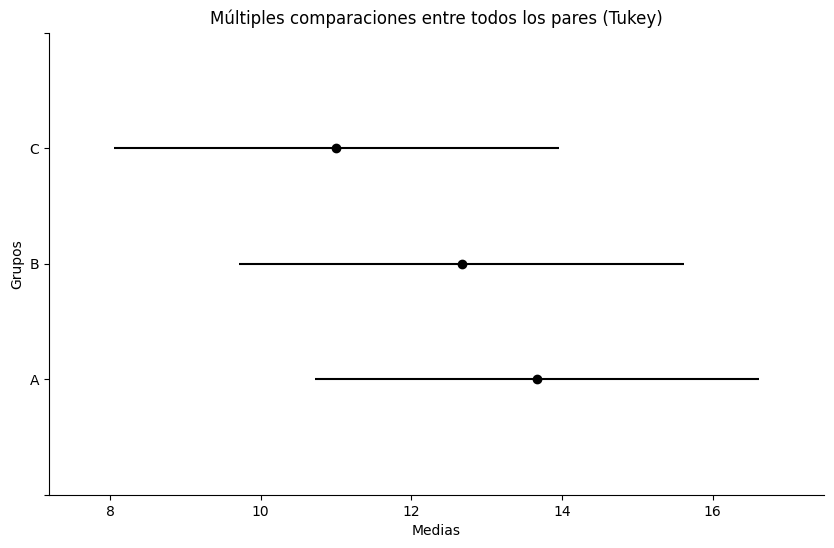

In [40]:
# Wendy Yarentzi Rebeles Vélez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Peso'], groups=df['Proveedor'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -4.6667 0.0141 -8.1098 -1.2235   True
     1      3     -2.0 0.2532 -5.4431  1.4431  False
     2      3   2.6667 0.1195 -0.7765  6.1098  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

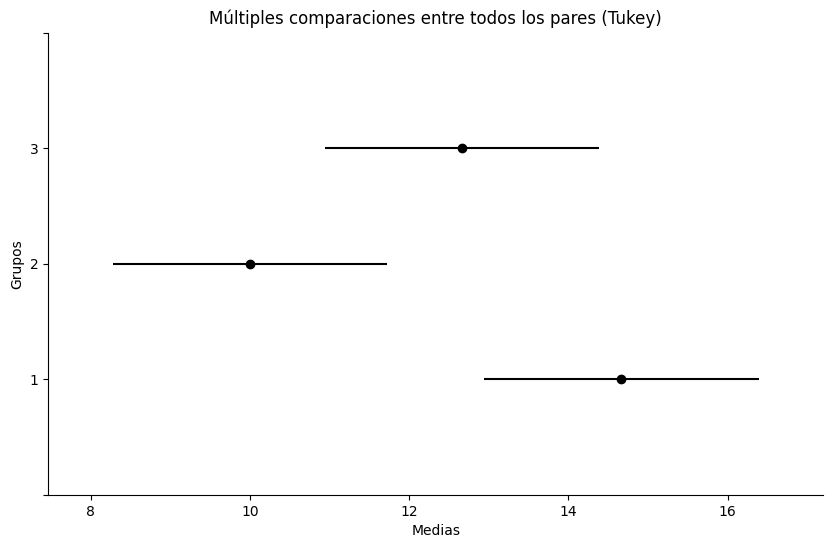

In [41]:
# Wendy Yarentzi Rebeles Vélez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Peso'], groups=df['Escala'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [42]:
# Wendy Yarentzi Rebeles Vélez
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Inspector'    # La variable que no me interesa comparar
interes = 'Proveedor'      # La variable que me interesa comparar
respuesta = 'Peso'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

Resultados del ANOVA:
                 sum_sq   df         F    PR(>F)
C(Proveedor)  10.888889  2.0  0.657718  0.566294
C(Inspector)   0.222222  2.0  0.013423  0.986711
Residual      33.111111  4.0       NaN       NaN

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


## Problema 3
Cuando se comparan varios fertilizantes o diferentes variedades de cierto cultivo, es típico que se deba considerar el gradiente de fertilidad del suelo (factor columna) o los efectos residuales de cultivos previos (factor renglón). Considerando estos factores de bloque, Gomez y Gomez (1984) plantean un experimento en cuadro latino para comparar, en cuanto a rendimiento en toneladas por hectárea, tres variedades de maíz híbrido (**A, B, C**) y una variedad control (**D**). Para ello, se utiliza un campo agrícola cuadrado de 16 hectáreas, dividido en parcelas de una hectárea. Los datos de rendimiento obtenidos en cada parcela se muestran a continuación:

| Ren\Col | 1       | 2       | 3       | 4       |
|---------|---------|---------|---------|---------|
| 1       | 1.640(B)| 1.210(D)| 1.425(C)| 1.345(A)|
| 2       | 1.475(C)| 1.185(A)| 1.400(D)| 1.290(B)|
| 3       | 1.670(A)| 0.710(C)| 1.665(B)| 1.180(D)|
| 4       | 1.565(D)| 1.290(B)| 1.655(A)| 0.660(C)|

**Preguntas y ejercicios:**<br>
**a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maíz?**
Sí, hay diferencias significativas en los rendimientos de las diferentes variedades de maíz (p = 0.0251). Esto significa que algunas variedades de maíz tienen un rendimiento significativamente mayor o menor en comparación con otras, lo que puede ser útil para seleccionar las mejores variedades para la producción agrícola.

**b) ¿Cuál de los factores de bloque tuvo efectos?**
El factor de bloque "efectos residuales" tuvo un efecto significativo (p = 0.0051), mientras que el factor "fertilidad" no tuvo un efecto significativo (p = 0.7170). Esto sugiere que los efectos residuales de cultivos previos influyen en el rendimiento del maíz, mientras que las diferencias en la fertilidad del suelo no son tan importantes en este experimento.

**c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?**
No, ya que uno de los bloques no tiene diferencia significativa.

d) ¿Y con un diseño en bloques completos al azar?  
Con un diseño en bloques completos al azar, las diferencias significativas entre las variedades de maíz aun es muy probable que se sigan detectando, pero con menor precisión..

In [12]:
# Wendy Yarentzi Rebeles Vélez
import pandas as pd
from io import StringIO

data = '''
Fertilidad,Efectos,Variedades,Rendimiento
1,1,B,1.640
1,2,D,1.210
1,3,C,1.425
1,4,A,1.345
2,1,C,1.475
2,2,A,1.185
2,3,D,1.400
2,4,B,1.290
3,1,A,1.670
3,2,C,0.710
3,3,B,1.665
3,4,D,1.180
4,1,D,1.565
4,2,B,1.290
4,3,A,1.655
4,4,C,0.660
'''

df = pd.read_csv(StringIO(data))
df

,Fertilidad,Efectos,Variedades,Rendimiento
0,1,1,B,1.640
1,1,2,D,1.210
2,1,3,C,1.425
3,1,4,A,1.345
4,2,1,C,1.475
5,2,2,A,1.185
6,2,3,D,1.400
7,2,4,B,1.290
8,3,1,A,1.670
9,3,2,C,0.710


Cuadro Látino.

In [13]:
# Wendy Yarentzi Rebeles Vélez
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Fertilidad'   # Primer bloque (factor no principal)
bloque_2 = 'Efectos'      # Segundo bloque (factor no principal)
interes = 'Variedades'       # Variable de interés (tratamiento)
respuesta = 'Rendimiento'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

Resultados del ANOVA para el Cuadro Latino:
                 sum_sq   df          F    PR(>F)
C(Variedades)  0.426842  3.0   6.587865  0.025092
C(Fertilidad)  0.030155  3.0   0.465406  0.716972
C(Efectos)     0.827342  3.0  12.769166  0.005148
Residual       0.129584  6.0        NaN       NaN

Conclusión: Hay diferencias significativas: Variedades.
Conclusión: No hay diferencias significativas: Fertilidad.
Conclusión: Hay diferencias significativas: Efectos.


Diseño completamente al azar.

In [14]:
# Wendy Yarentzi Rebeles Vélez
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Efectos'    # La variable que no me interesa comparar
interes = 'Variedades'      # La variable que me interesa comparar
respuesta = 'Rendimiento'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

Resultados del ANOVA:
                 sum_sq   df          F    PR(>F)
C(Variedades)  0.426842  3.0   8.016365  0.006543
C(Efectos)     0.827342  3.0  15.538006  0.000665
Residual       0.159739  9.0        NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


## Problema 4
Una compañía distribuidora ubicada en los suburbios está interesada en estudiar la diferencia en costos (tiempo y gasolina) entre las cuatro rutas (**A, B, C, D**) que llevan a la zona comercial, más importante para ellos, en el otro extremo de la ciudad. Deciden correr un experimento en cuadro grecolatino controlando los factores de bloque **chofer**, marca de vehículo (**α, β, χ, δ**) y día de la semana. El experimento se repite en dos semanas diferentes, en las cuales no hay días festivos ni quincenas. Los costos observados en pesos se muestran en la siguiente tabla:

| Chofer/día | Lunes       | Martes      | Miércoles   | Jueves      |
|------------|-------------|-------------|-------------|-------------|
| Carlos     | 825(D, α)   | 585(C, χ)   | 550(B, β)   | 580(A, δ)   |
|            | 750         | 610         | 580         | 650         |
| Enrique    | 650(A, χ)   | 540(B, α)   | 580(C, χ)   | 850(D, β)   |
|            | 725         | 560         | 635         | 770         |
| Genaro     | 700(C, β)   | 650(D, δ)   | 635(A, α)   | 450(B, χ)   |
|            | 675         | 740         | 540         | 550         |
| Luis       | 475(B, δ)   | 560(A, β)   | 650(D, α)   | 670(C, α)   |
|            | 480         | 615         | 725         | 730         |

### Preguntas:
**a) Haga el análisis de varianza de este experimento.**
El análisis de varianza mostró diferencias significativas en las rutas (p < 0.0001) y días (p = 0.0411), pero no entre choferes (p = 0.1413) ni marcas (p = 0.0533). Esto indica que las rutas y los días de la semana tienen un impacto significativo en los costos, mientras que los choferes y las marcas de los vehículos no.

**b) Realice las pruebas de comparaciones múltiples para los factores significativos.**
Las pruebas de comparaciones múltiples (Tukey) mostraron que las rutas B y D tienen diferencias significativas en los costos, mientras que las rutas A y C no presentan diferencias significativas. Esto sugiere que las rutas B y D son las más distintas en términos de costos, con la ruta B siendo la más económica y la ruta D la más costosa.

**c) Represente los tratamientos y factores de bloque usando gráficas de medias y diagramas de dispersión.**  
La mejor ruta es la B, ya que tiene el costo promedio más bajo. La peor ruta es la D, ya que tiene el costo promedio más alto. Esto se basa en los resultados del análisis de varianza y las pruebas de comparaciones múltiples

**d) ¿Cuál es la mejor ruta? ¿Cuál es la peor?**
La mejor ruta es la B, ya que es la del menor costo promedio.
La peor rita es la D, ya que es la de mayor costo

**e) ¿Hay diferencias significativas entre los choferes? ¿Y entre el tipo o marca de unidad?**
No hay diferencias significativas entre los choferes (p = 0.732) ni entre las marcas de los vehículos (p = 0.332). Esto sugiere que las variaciones en los costos no se deben a quién conduce o a la marca del vehículo, sino a otros factores como la ruta y el día de la semana

**f) ¿Cuáles factores de bloque valió la pena tomar en cuenta en el experimento?**
Los factores de bloque "ruta" y "día" tuvieron un efecto significativo en el experimento, por lo que valió la pena considerarlos. Estos factores influyen en los costos y deben ser tomados en cuenta en futuros análisis para optimizar las rutas y reducir los costos.

**g) ¿Por qué se evitaron días festivos y quincenas en el experimento? ¿Cuáles otros aspectos se tenían que tomar en cuenta?**
* Los días festivos y quincenas podrían alterar los costos debido a que el tráfico es mucho más alto, ya que mucha gente sale a comprar sus mandandos o cosas que necesitaban, y en dias festivos la gente aprovecha para hacer actividades pendientes o algunas suelen quedarse el casa y eso hace que tambien el trafico disminuye, por lo que la mejor opcion es evitar estos días para tener la certeza de que los cálculos son muy similares.

**h) Verifique los supuestos del modelo**
* Normalidad: Confirmada por la prueba de Shapiro-Wilk (p=0.728)

* Homocedasticidad: Confirmada por la prueba de Bartlett (p=0.745)

* Independencia: Si hay independencia en los residuos


In [15]:
# Wendy Yarentzi Rebeles Vélez
import pandas as pd
from io import StringIO

# Datos en formato de texto
data = '''
Chofer,Día,Ruta,Marca,Costo
Carlos,Lunes,D,α,825
Carlos,Martes,C,χ,585
Carlos,Miércoles,B,β,550
Carlos,Jueves,A,δ,580
Enrique,Lunes,A,χ,650
Enrique,Martes,B,α,540
Enrique,Miércoles,C,χ,580
Enrique,Jueves,D,β,850
Genaro,Lunes,C,β,700
Genaro,Martes,D,δ,650
Genaro,Miércoles,A,α,635
Genaro,Jueves,B,χ,450
Luis,Lunes,B,δ,475
Luis,Martes,A,β,560
Luis,Miércoles,D,α,650
Luis,Jueves,C,α,670
Carlos,Lunes,D,α,750
Carlos,Martes,C,χ,610
Carlos,Miércoles,B,β,580
Carlos,Jueves,A,δ,650
Enrique,Lunes,A,χ,725
Enrique,Martes,B,α,560
Enrique,Miércoles,C,χ,635
Enrique,Jueves,D,β,770
Genaro,Lunes,C,β,675
Genaro,Martes,D,δ,740
Genaro,Miércoles,A,α,540
Genaro,Jueves,B,χ,550
Luis,Lunes,B,δ,480
Luis,Martes,A,β,615
Luis,Miércoles,D,α,725
Luis,Jueves,C,α,730
'''

# Crear el DataFrame
df = pd.read_csv(StringIO(data))

# Mostrar el DataFrame
print(df)

     Chofer        Día Ruta Marca  Costo
0    Carlos      Lunes    D     α    825
1    Carlos     Martes    C     χ    585
2    Carlos  Miércoles    B     β    550
3    Carlos     Jueves    A     δ    580
4   Enrique      Lunes    A     χ    650
5   Enrique     Martes    B     α    540
6   Enrique  Miércoles    C     χ    580
7   Enrique     Jueves    D     β    850
8    Genaro      Lunes    C     β    700
9    Genaro     Martes    D     δ    650
10   Genaro  Miércoles    A     α    635
11   Genaro     Jueves    B     χ    450
12     Luis      Lunes    B     δ    475
13     Luis     Martes    A     β    560
14     Luis  Miércoles    D     α    650
15     Luis     Jueves    C     α    670
16   Carlos      Lunes    D     α    750
17   Carlos     Martes    C     χ    610
18   Carlos  Miércoles    B     β    580
19   Carlos     Jueves    A     δ    650
20  Enrique      Lunes    A     χ    725
21  Enrique     Martes    B     α    560
22  Enrique  Miércoles    C     χ    635
23  Enrique     

## ANOVA

In [16]:
# Wendy Yarentzi Rebeles Vélez
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Chofer'   # Primer bloque (factor no principal)
bloque_2 = 'Día'      # Segundo bloque (factor no principal)
bloque_3 = 'Marca'    # Tercer bloque (factor no principal)
interes = 'Ruta'     # Variable de interés (tratamiento)
respuesta = 'Costo'  # Variable de respuesta (medición) que permite la comparación -

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2}) + C({bloque_3})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

if tabla_anova["PR(>F)"][f"C({bloque_3})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_3}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_3}.")

Resultados del ANOVA para el Cuadro Latino:
                  sum_sq    df          F    PR(>F)
C(Ruta)    169118.651096   3.0  24.120992  0.000001
C(Chofer)   14356.783537   3.0   2.047674  0.141263
C(Día)      23421.502739   3.0   3.340553  0.041149
C(Marca)    21443.762703   3.0   3.058473  0.053287
Residual    44404.674797  19.0        NaN       NaN

Conclusión: Hay diferencias significativas: Ruta.
Conclusión: No hay diferencias significativas: Chofer.
Conclusión: Hay diferencias significativas: Día.
Conclusión: No hay diferencias significativas: Marca.


## TUKEY para los que si hay diferencias significativas

Resultados de la prueba de Tukey para Ruta:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B   -96.25 0.0148 -176.9789 -15.5211   True
     A      C    28.75 0.7661  -51.9789 109.4789  False
     A      D  125.625 0.0012   44.8961 206.3539   True
     B      C    125.0 0.0012   44.2711 205.7289   True
     B      D  221.875    0.0  141.1461 302.6039   True
     C      D   96.875 0.0141   16.1461 177.6039   True
-------------------------------------------------------


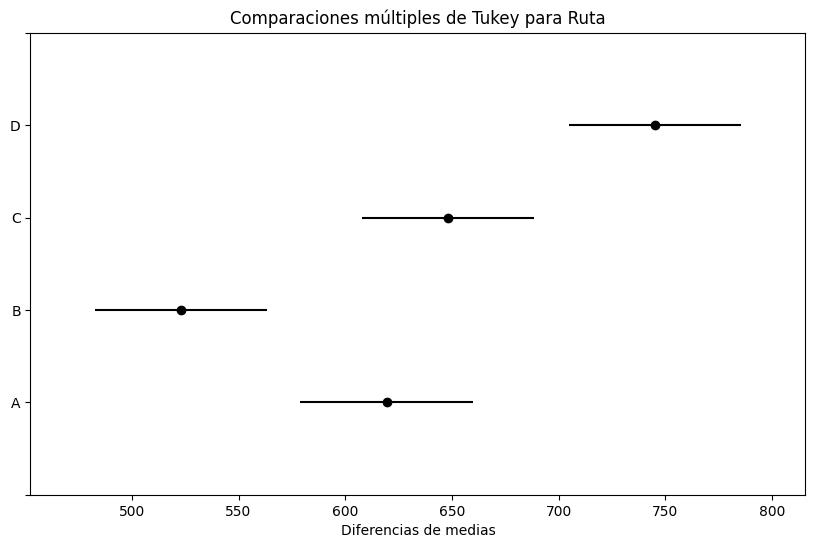


Resultados de la prueba de Tukey para Día:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1   group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
Jueves     Lunes     3.75 0.9998 -132.5788 140.0788  False
Jueves    Martes   -48.75 0.7639 -185.0788  87.5788  False
Jueves Miércoles  -44.375 0.8107 -180.7038  91.9538  False
 Lunes    Martes    -52.5 0.7211 -188.8288  83.8288  False
 Lunes Miércoles  -48.125 0.7708 -184.4538  88.2038  False
Martes Miércoles    4.375 0.9998 -131.9538 140.7038  False
----------------------------------------------------------


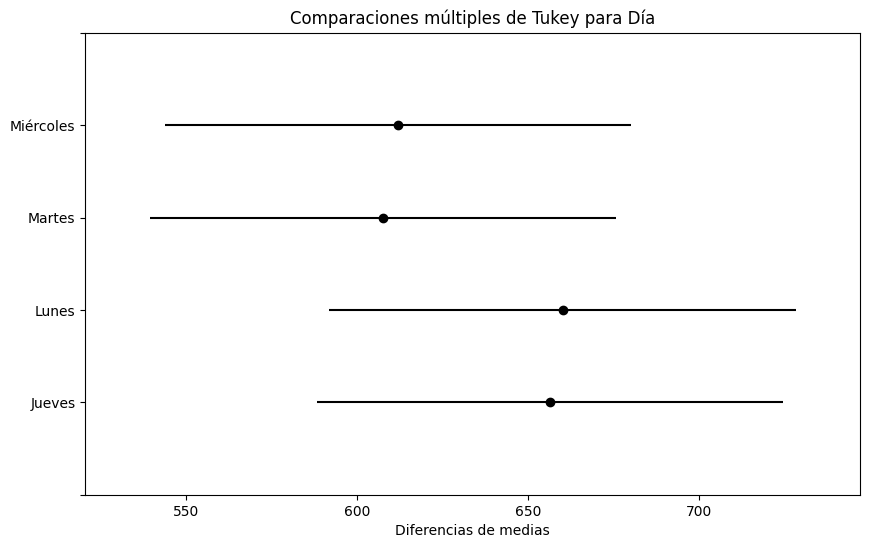

In [17]:
# Wendy Yarentzi Rebeles Vélez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Prueba de Tukey para el factor Ruta
tukey_ruta = pairwise_tukeyhsd(endog=df['Costo'], groups=df['Ruta'], alpha=0.05)
print("Resultados de la prueba de Tukey para Ruta:")
print(tukey_ruta)

# Gráfico para Tukey
tukey_ruta.plot_simultaneous()
plt.title("Comparaciones múltiples de Tukey para Ruta")
plt.xlabel("Diferencias de medias")
plt.show()

# Prueba de Tukey para el factor Día
tukey_dia = pairwise_tukeyhsd(endog=df['Costo'], groups=df['Día'], alpha=0.05)
print("\nResultados de la prueba de Tukey para Día:")
print(tukey_dia)

# Gráfico para Tukey
tukey_dia.plot_simultaneous()
plt.title("Comparaciones múltiples de Tukey para Día")
plt.xlabel("Diferencias de medias")
plt.show()


<ipython-input-18-e4b39b0d3622>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Ruta', y='Costo', ci='sd')


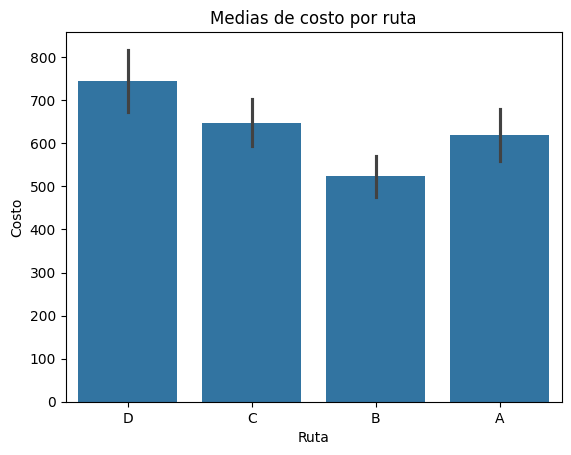

<ipython-input-18-e4b39b0d3622>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Chofer', y='Costo', ci='sd')


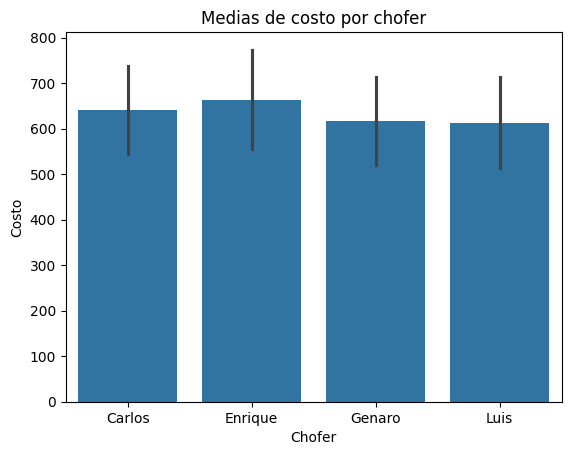

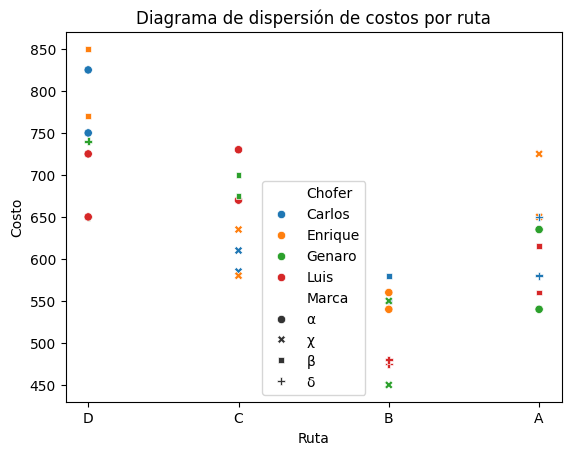

In [18]:
# Wendy Yarentzi Rebeles Vélez
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfica de medias por ruta
sns.barplot(data=df, x='Ruta', y='Costo', ci='sd')
plt.title('Medias de costo por ruta')
plt.show()

# Gráfica de medias por chofer
sns.barplot(data=df, x='Chofer', y='Costo', ci='sd')
plt.title('Medias de costo por chofer')
plt.show()

sns.scatterplot(data=df, x='Ruta', y='Costo', hue='Chofer', style='Marca')
plt.title('Diagrama de dispersión de costos por ruta')
plt.show()


In [19]:
# Wendy Yarentzi Rebeles Vélez
from scipy import stats
costos_carlos = df[df["Chofer"] == "Carlos"]["Costo"]
costos_enrique = df[df["Chofer"] == "Enrique"]["Costo"]
costos_genaro = df[df["Chofer"] == "Genaro"]["Costo"]
costos_luis = df[df["Chofer"] == "Luis"]["Costo"]

# Realizamos el ANOVA
f_stat, p_value = stats.f_oneway(costos_carlos, costos_enrique, costos_genaro, costos_luis)

# Mostramos los resultados
print(f"Estadística F: {f_stat}")
print(f"Valor p: {p_value}")

# Interpretación
if p_value < 0.05:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa entre los choferes.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que hay diferencia entre los choferes.")

Estadística F: 0.4311719358270005
Valor p: 0.732295400884009
No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que hay diferencia entre los choferes.


In [21]:
# Wendy Yarentzi Rebeles Vélez
# Agrupamos los costos por marca de vehículo
costos_alpha = df[df["Marca"] == "α"]["Costo"]
costos_beta = df[df["Marca"] == "β"]["Costo"]
costos_chi = df[df["Marca"] == "χ"]["Costo"]
costos_delta = df[df["Marca"] == "δ"]["Costo"]

# Realizamos el ANOVA
f_stat, p_value = stats.f_oneway(costos_alpha, costos_beta, costos_chi, costos_delta)

# Mostramos los resultados
print(f"Estadística F: {f_stat}")
print(f"Valor p: {p_value}")

# Interpretación
if p_value < 0.05:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa entre las marcas de vehículos.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que hay diferencia entre las marcas de vehículos.")


Estadística F: 1.1877162095987543
Valor p: 0.3322997212482735
No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que hay diferencia entre las marcas de vehículos.


In [22]:
# Wendy Yarentzi Rebeles Vélez
modelo = ols("Costo ~ C(Chofer) + C(Día) + C(Marca)", data=df).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)

# Mostramos los resultados del ANOVA
print(anova_table)

# Interpretación
for factor in anova_table.index:
    p_value = anova_table.loc[factor, "PR(>F)"]
    if p_value < 0.05:
        print(f"El factor {factor} tiene un efecto significativo en los costos (p = {p_value:.4f}).")
    else:
        print(f"El factor {factor} no tiene un efecto significativo en los costos (p = {p_value:.4f}).")

                  sum_sq    df         F    PR(>F)
C(Chofer)   23099.648644   3.0  0.793344  0.510636
C(Día)      27033.324107   3.0  0.928444  0.443548
C(Marca)    52546.205357   3.0  1.804669  0.175778
Residual   213523.325893  22.0       NaN       NaN
El factor C(Chofer) no tiene un efecto significativo en los costos (p = 0.5106).
El factor C(Día) no tiene un efecto significativo en los costos (p = 0.4435).
El factor C(Marca) no tiene un efecto significativo en los costos (p = 0.1758).
El factor Residual no tiene un efecto significativo en los costos (p = nan).


## SUPUESTOS

# Normalidad

In [23]:
# Wendy Yarentzi Rebeles Vélez
from scipy.stats import shapiro, levene, bartlett, probplot

# Residuos del modelo
residuos = modelo.resid

# 1. Normalidad de los residuos
# Prueba de Shapiro-Wilk
stat, p_value_shapiro = shapiro(residuos)
print(f"Prueba de Shapiro-Wilk: Estadístico={stat}, p-valor={p_value_shapiro}")
if p_value_shapiro < 0.05:
    print("Los residuos no siguen una distribución normal.")
else:
    print("Los residuos siguen una distribución normal.")


Prueba de Shapiro-Wilk: Estadístico=0.9776398487421321, p-valor=0.728624586078335
Los residuos siguen una distribución normal.


## Homocedasticidad

In [24]:
# Wendy Yarentzi Rebeles Vélez
from scipy.stats import bartlett

# Nivel de significancia
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett para las rutas
stat, p_value = bartlett(
    df[df['Ruta'] == 'A']['Costo'],
    df[df['Ruta'] == 'B']['Costo'],
    df[df['Ruta'] == 'C']['Costo'],
    df[df['Ruta'] == 'D']['Costo']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales (heterocedasticidad).")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales (homocedasticidad).")


Estadístico de Bartlett: 1.2336478850547536
Valor p: 0.7449459826882852
No podemos rechazar la hipótesis nula: Las varianzas son iguales (homocedasticidad).


## Independencia

Si hay independencia en los residuos

## Problema 5
Un investigador está interesado en el efecto del porcentaje de lisina y del porcentaje de proteína en la producción de vacas lecheras. Se consideran siete niveles en cada factor:

- **% de lisina**: 0.0 (**A**), 0.1 (**B**), 0.2 (**C**), 0.3 (**D**), 0.4 (**E**), 0.5 (**F**), 0.6 (**G**).  
- **% de proteína**: 2 (**α**), 4 (**β**), 6 (**χ**), 8 (**δ**), 10 (**ε**), 12 (**φ**), 14 (**γ**).  

Para el estudio, se seleccionaron siete vacas al azar, a las cuales se les da un seguimiento de siete periodos de tres meses. Los datos en galones de leche fueron los siguientes:

| Vaca/periodo | 1       | 2       | 3       | 4       | 5       | 6       | 7       |
|--------------|---------|---------|---------|---------|---------|---------|---------|
| 1            | 304 (Aα)| 436 (Bε)| 350 (Cβ)| 504 (Dφ)| 417 (Eχ)| 519 (Fγ)| 432 (Gδ)|
| 2            | 381 (Bβ)| 505 (Cφ)| 425 (Dχ)| 564 (Eγ)| 487 (Fα)| 536 (Gε)| 483 (Aχ)|
| 3            | 432 (Cχ)| 566 (Dγ)| 479 (Eε)| 357 (Fα)| 466 (Gβ)| 465 (Aφ)| 507 (Bγ)|
| 4            | 442 (Dδ)| 372 (Eχ)| 536 (Fε)| 366 (Gβ)| 495 (Aχ)| 425 (Bφ)| 507 (Cγ)|
| 5            | 496 (Eε)| 449 (Fβ)| 493 (Gφ)| 345 (Aχ)| 509 (Bγ)| 481 (Cδ)| 380 (Dα)|
| 6            | 534 (Fφ)| 421 (Gχ)| 352 (Aγ)| 427 (Bδ)| 346 (Cχ)| 478 (Dε)| 397 (Eβ)|
| 7            | 543 (Gγ)| 386 (Aδ)| 435 (Bα)| 485 (Cε)| 406 (Dφ)| 554 (Eφ)| 410 (Fχ)|

### Preguntas y ejercicios:
**a) Analice este experimento. ¿Qué factores tienen efecto en la producción de leche?**  
El análisis de varianza mostró que ni el porcentaje de lisina (p = 0.953) ni el porcentaje de proteína (p = 0.674) tienen un efecto significativo en la producción de leche. Además, los bloques (vaca y periodo) tampoco tienen efectos significativos (p > 0.841). La interacción entre lisina y proteína tampoco es significativa (p = 0.924). Esto sugiere que las variaciones en la producción de leche no están influenciadas por estos factores en este experimento. La falta de significancia indica que los niveles de lisina y proteína, así como los bloques, no afectan de manera importante la producción de leche.

**b) Interprete los resultados usando gráficos de medias**  
* Las medias de producción no varían significativamente entre niveles de Lisina ni de Proteína.
* La interacción tampoco muestra patrones claros en las gráficas

**c) ¿Cómo puede explicar la falta de efectos en vacas y periodo?**
La falta de efectos en las vacas puede deberse a que las vacas seleccionadas tienen características muy similares, como peso, edad y estado de salud, lo que reduce la variabilidad en la producción de leche. La falta de efectos en los periodos puede deberse a que los periodos de tres meses no son lo suficientemente largos para capturar cambios significativos en la producción de leche, es decir, el tiempo de observación es demasiado corto para detectar diferencias. La homogeneidad de las vacas y la duración insuficiente de los periodos pueden explicar la falta de efectos significativos.

d) ¿Qué porcentajes de lisina y proteína dan los mejores resultados?
**El porcentaje que da mejores resultados, es decir, más produccion de leche, es el 0.3% de lisia y 14% de proteína, según la gráfica de medias.**

e) Verifique los supuestos del modelo.  
* **Normalidad: Residuos siguen una distribución normal.**
* **Homocedasticidad: Las varianzas son homogéneas.**
* **Independencia: Gráficos no muestran patrones preocupantes**

## Data.frame

In [25]:
# Wendy Yarentzi Rebeles Vélez
import pandas as pd
from io import StringIO

# Datos en formato de texto
data = '''
Vaca,Periodo,Producción,Lisina,Proteína
1,1,304,A,α
1,2,436,B,β
1,3,350,C,χ
1,4,504,D,δ
1,5,417,E,ε
1,6,519,F,φ
1,7,432,G,γ
2,1,381,B,β
2,2,505,C,φ
2,3,425,D,χ
2,4,564,E,γ
2,5,487,F,α
2,6,536,G,ε
2,7,483,A,χ
3,1,432,C,χ
3,2,566,D,γ
3,3,479,E,ε
3,4,357,F,ε
3,5,466,G,β
3,6,465,A,φ
3,7,507,B,γ
4,1,442,D,δ
4,2,372,E,χ
4,3,536,F,ε
4,4,366,G,β
4,5,495,A,χ
4,6,425,B,φ
4,7,507,C,γ
5,1,496,E,ε
5,2,449,F,β
5,3,493,G,φ
5,4,345,A,χ
5,5,509,B,γ
5,6,481,C,χ
5,7,380,D,α
6,1,534,F,φ
6,2,421,G,χ
6,3,352,A,γ
6,4,427,B,δ
6,5,346,C,χ
6,6,478,D,ε
6,7,397,E,β
7,1,543,G,γ
7,2,386,A,δ
7,3,435,B,α
7,4,485,C,ε
7,5,406,D,φ
7,6,554,E,φ
7,7,410,F,χ
'''

# Crear el DataFrame
df = pd.read_csv(StringIO(data))

# Mostrar el DataFrame
print(df)


    Vaca  Periodo  Producción Lisina Proteína
0      1        1         304      A        α
1      1        2         436      B        β
2      1        3         350      C        χ
3      1        4         504      D        δ
4      1        5         417      E        ε
5      1        6         519      F        φ
6      1        7         432      G        γ
7      2        1         381      B        β
8      2        2         505      C        φ
9      2        3         425      D        χ
10     2        4         564      E        γ
11     2        5         487      F        α
12     2        6         536      G        ε
13     2        7         483      A        χ
14     3        1         432      C        χ
15     3        2         566      D        γ
16     3        3         479      E        ε
17     3        4         357      F        ε
18     3        5         466      G        β
19     3        6         465      A        φ
20     3        7         507     

## a) ANOVA

Lisina

In [26]:
# Wendy Yarentzi Rebeles Vélez
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Vaca'   # Primer bloque (factor no principal)
bloque_2 = 'Periodo'      # Segundo bloque (factor no principal)
interes = 'Lisina'       # Variable de interés (tratamiento)
respuesta = 'Producción'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

Resultados del ANOVA para el Cuadro Latino:
                   sum_sq    df         F    PR(>F)
C(Lisina)    22273.714286   6.0  0.736395  0.624363
C(Vaca)      20894.000000   6.0  0.690780  0.658695
C(Periodo)   16253.428571   6.0  0.537357  0.775506
Residual    151234.857143  30.0       NaN       NaN

Conclusión: No hay diferencias significativas: Lisina.
Conclusión: No hay diferencias significativas: Vaca.
Conclusión: No hay diferencias significativas: Periodo.


Proteína

In [27]:
# Wendy Yarentzi Rebeles Vélez
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd
# Configuración de variables
bloque_1 = 'Vaca'   # Primer bloque (factor no principal)
bloque_2 = 'Periodo'      # Segundo bloque (factor no principal)
interes = 'Proteína'       # Variable de interés (tratamiento)
respuesta = 'Producción'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

Resultados del ANOVA para el Cuadro Latino:
                    sum_sq    df         F    PR(>F)
C(Proteína)   56978.139649   6.0  2.444775  0.048136
C(Vaca)       22004.566016   6.0  0.944155  0.478698
C(Periodo)     8670.951919   6.0  0.372047  0.890896
Residual     116530.431780  30.0       NaN       NaN

Conclusión: Hay diferencias significativas: Proteína.
Conclusión: No hay diferencias significativas: Vaca.
Conclusión: No hay diferencias significativas: Periodo.


Gráfico de medias

<ipython-input-28-0ea2f2dfa0e5>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Lisina', y='Producción', hue='Proteína', ci="sd", palette="muted")


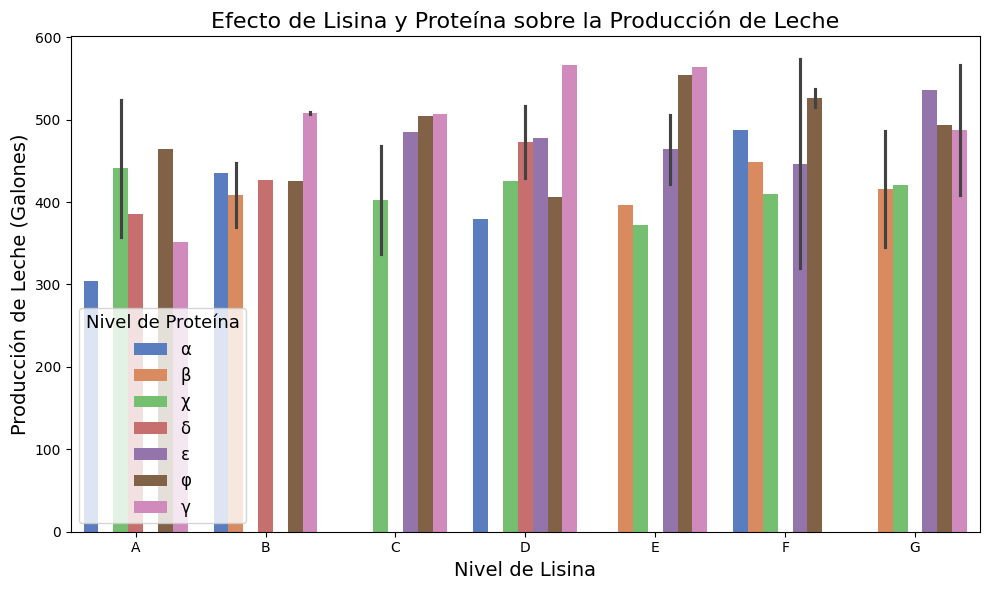

In [28]:
# Wendy Yarentzi Rebeles Vélez
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar el efecto de Lisina y Proteína sobre la Producción de leche
plt.figure(figsize=(10, 6))

# Crear gráfico de barras
sns.barplot(data=df, x='Lisina', y='Producción', hue='Proteína', ci="sd", palette="muted")

# Títulos y etiquetas
plt.title("Efecto de Lisina y Proteína sobre la Producción de Leche", fontsize=16)
plt.xlabel("Nivel de Lisina", fontsize=14)
plt.ylabel("Producción de Leche (Galones)", fontsize=14)
plt.legend(title="Nivel de Proteína", title_fontsize='13', fontsize='12')

# Mostrar gráfico
plt.tight_layout()
plt.show()


## SUPUESTOS

# Normalidad

In [29]:
# Wendy Yarentzi Rebeles Vélez
from scipy.stats import shapiro, levene, bartlett, probplot

# Residuos del modelo
residuos = modelo.resid

# Prueba de Shapiro-Wilk
stat, p_value_shapiro = shapiro(residuos)
print(f"Prueba de Shapiro-Wilk: Estadístico={stat}, p-valor={p_value_shapiro}")
if p_value_shapiro < 0.05:
    print("Los residuos no siguen una distribución normal.")
else:
    print("Los residuos siguen una distribución normal.")

Prueba de Shapiro-Wilk: Estadístico=0.9754040139086138, p-valor=0.3911628450511684
Los residuos siguen una distribución normal.


# Homocedasticidad.

Lisina

In [30]:
# Wendy Yarentzi Rebeles Vélez
from scipy.stats import bartlett

# Nivel de significancia
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett para las rutas
stat, p_value = bartlett(
    df[df['Lisina'] == 'A']['Producción'],
    df[df['Lisina'] == 'B']['Producción'],
    df[df['Lisina'] == 'C']['Producción'],
    df[df['Lisina'] == 'D']['Producción'],
    df[df['Lisina'] == 'E']['Producción'],
    df[df['Lisina'] == 'F']['Producción'],
    df[df['Lisina'] == 'G']['Producción']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales (heterocedasticidad).")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales (homocedasticidad).")


Estadístico de Bartlett: 1.660655175148038
Valor p: 0.9481181565535186
No podemos rechazar la hipótesis nula: Las varianzas son iguales (homocedasticidad).


Proteína

In [31]:
# Wendy Yarentzi Rebeles Vélez
from scipy.stats import bartlett

# Nivel de significancia
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett para las rutas
stat, p_value = bartlett(
    df[df['Proteína'] == 'α']['Producción'],
    df[df['Proteína'] == 'β']['Producción'],
    df[df['Proteína'] == 'χ']['Producción'],
    df[df['Proteína'] == 'δ']['Producción'],
    df[df['Proteína'] == 'ε']['Producción'],
    df[df['Proteína'] == 'φ']['Producción'],
    df[df['Proteína'] == 'γ']['Producción']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales (heterocedasticidad).")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales (homocedasticidad).")

Estadístico de Bartlett: 2.682501312740467
Valor p: 0.8475098046372448
No podemos rechazar la hipótesis nula: Las varianzas son iguales (homocedasticidad).


# Independencia

Si hay independencia en los residuos.